# Generate Data Points

The problem is that $\nabla^{2} T(x,y) = 0$ in $(x,y) \in [0,1] \times [0,1]$ with boudnary condition $T(0,y)=150, T(1,y)=0, T(x,1)=50, T(x,0)=100$. So, define the grid size $N$ and set data grids $(N+1) \times (N+1)$ in given $(0,1) \times (0,1)$ grid. So boundary points at $i=0$ and $i=N$ and updating points is at $i=1 - N$.


In [22]:
import numpy as np
import matplotlib.pyplot as plt

class DataGrid:
    def __init__(self, N):
        self.N = N
        self.h = 1/(N+1)
        self.x = np.linspace(0, 1, N+1)
        self.y = np.linspace(0, 1, N+1)
        self.T = np.zeros((N+1, N+1))
        self.T[0, :] = 150
        self.T[N, :] = 0
        self.T[:, 0] = 100
        self.T[:, N] = 50
    
    def show(self):
        bc_points = np.zeros((4*(self.N+1), 2))
        bc_values = np.zeros(4*(self.N+1))
        # 왼쪽 경계 (x=0)
        bc_points[0:self.N+1, 0] = 0
        bc_points[0:self.N+1, 1] = self.y
        bc_values[0:self.N+1] = 150
        # 오른쪽 경계 (x=1)
        bc_points[self.N+1:2*(self.N+1), 0] = 1
        bc_points[self.N+1:2*(self.N+1), 1] = self.y
        bc_values[self.N+1:2*(self.N+1)] = 0
        # 아래쪽 경계 (y=0)
        bc_points[2*(self.N+1):3*(self.N+1), 0] = self.x
        bc_points[2*(self.N+1):3*(self.N+1), 1] = 0
        bc_values[2*(self.N+1):3*(self.N+1)] = 100
        # 위쪽 경계 (y=1)
        bc_points[3*(self.N+1):4*(self.N+1), 0] = self.x
        bc_points[3*(self.N+1):4*(self.N+1), 1] = 1
        bc_values[3*(self.N+1):4*(self.N+1)] = 50

        X,Y = np.meshgrid(self.x, self.y)
        T = self.T

        plt.figure(figsize=(10, 10))
        plt.scatter(X, Y, c='red', marker='.')
        plt.scatter(bc_points[:, 0], bc_points[:, 1], c=bc_values, marker='o', vmin=0, vmax=150)
        plt.colorbar(label='Temperature')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Boundary Points')
        plt.show()

    def update(self, T_new):
        self.T = T_new

    def get_T(self, i, j):
        return self.T[i, j]

    def get_xy(self, i, j):
        return self.x[i], self.y[j]

    def get_T_at_xy(self, x, y):
        i = np.argmin(np.abs(self.x - x))
        j = np.argmin(np.abs(self.y - y))
        return self.T[i, j]

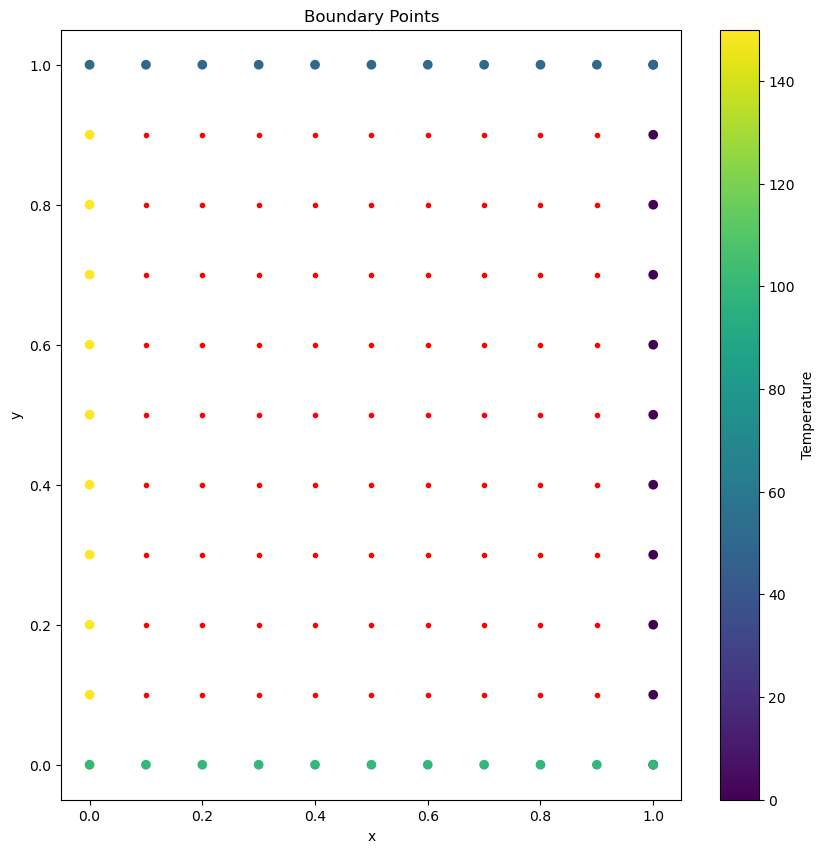

In [23]:
data_grid = DataGrid(10)
data_grid.show()

# Gauss-Seidel Method

$$
\varphi_{i,j}^{n+1} = \frac{1}{4} \left( \varphi_{i+1,j}^{n} + \varphi_{i-1,j}^{n} + \varphi_{i,j+1}^{n} + \varphi_{i,j-1}^{n} \right)
$$